#### Import libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from datetime import datetime as dt

2023-08-26 22:23:28.656295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Definition of model training hyperparameters

In [2]:
EPOCHS = 10
BATCH_SIZE = 32

#### Modeling data fetching

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [4]:
_max_value = train_images.max().astype(np.float32)

# Data normalization
train_images, test_images = train_images/_max_value, test_images/_max_value

CLASS_NAMES = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

##### Check data

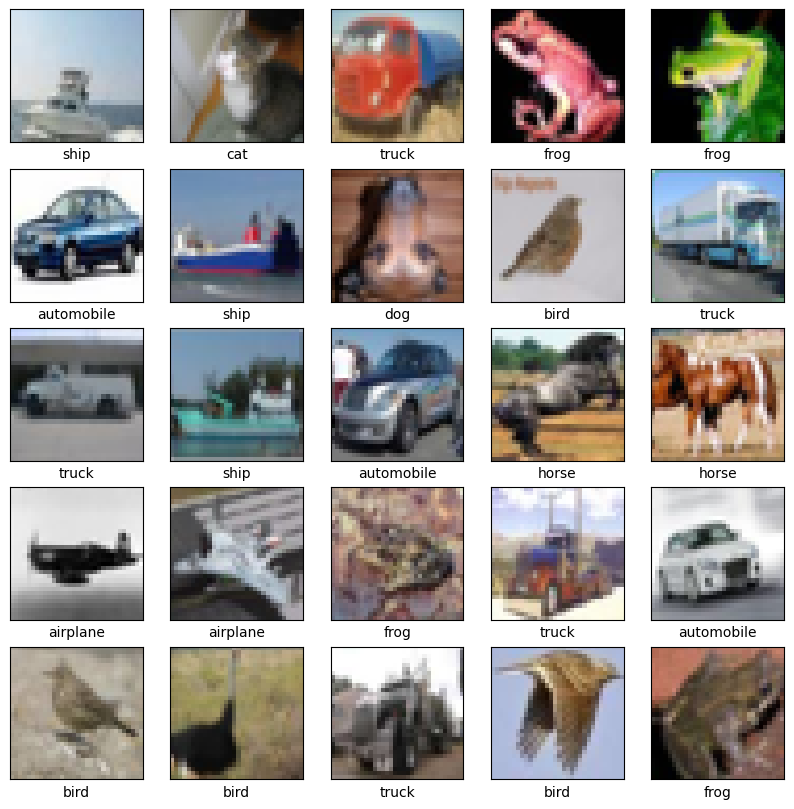

In [5]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100])
    plt.xlabel(CLASS_NAMES[train_labels[i+100][0]])
    
plt.show()

#### Model

##### Define

In [6]:
kargs = {
    'model_name'    : 'Cifar10CnnClassifier',
    'input_filter'  : 128,
    'conv_filter'   : 256,
    'full_units'    : 512,
    'output_dims'   : 10,
}

In [7]:
class Cifar10CnnClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(Cifar10CnnClassifier, self).__init__(name=kargs['model_name'])
        
        # (3,3) --> 3, input_shape=train_images[0].shape
        # If you add the input shape, immediately run 'model.summary()'
        self._input     = Conv2D(
                              kargs['input_filter'], 
                              (3, 3), 
                              activation='relu', 
                              input_shape=train_images[0].shape
                          )
        # MaxPooling2D: (2,2) --> (1,1)
        # Reduces processing time and prevents overfitting
        self._mp2d_1    = MaxPooling2D((2,2))
        self._hidden_1  = Conv2D(kargs['conv_filter'], (3, 3), activation='relu')
        self._mp2d_2    = MaxPooling2D((2,2))
        self._hidden_2  = Conv2D(kargs['conv_filter'], (3, 3), activation='relu')
        self._mp2d_3    = MaxPooling2D((2,2))
        self._flatten   = Flatten()
        self._full_con  = Dense(kargs['full_units'], activation='relu')
        self._output    = Dense(kargs['output_dims'], activation='softmax')
        
    def call(self, input):
        _model = self._input(input)
        _model = self._mp2d_1(_model)
        _model = self._hidden_1(_model)
        _model = self._mp2d_2(_model)
        _model = self._hidden_2(_model)
        _model = self._mp2d_3(_model)
        _model = self._flatten(_model)
        _model = self._full_con(_model)
        _model = self._output(_model)
        return _model

#### Create with original

In [8]:
model_original = Cifar10CnnClassifier(**kargs)

2023-08-26 22:23:31.690475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-26 22:23:31.695563: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-26 22:23:31.695821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
model_original.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

##### Fit

In [10]:
history = model_original.fit(
    train_images, train_labels,
    epochs=EPOCHS,
    validation_data=(test_images, test_labels)
)

2023-08-26 22:23:32.824438: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2023-08-26 22:23:33.268490: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2023-08-26 22:23:34.502265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8904
2023-08-26 22:23:36.145825: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:23:36.294642: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fd4d00090e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-26 22:23:36.294672: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-08-26 22:23:36.298804: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-26 22:23:36.361694: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 22:23:36.407324: I ./tensorflow/compiler/jit/device_comp

1563/1563 [==============================] - 16s 7ms/step - loss: 1.4773 - accuracy: 0.4616 - val_loss: 1.1664 - val_accuracy: 0.5857
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0465 - accuracy: 0.6294 - val_loss: 0.9763 - val_accuracy: 0.6602
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8593 - accuracy: 0.6989 - val_loss: 0.8951 - val_accuracy: 0.6877
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7341 - accuracy: 0.7428 - val_loss: 0.8438 - val_accuracy: 0.7146
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6321 - accuracy: 0.7793 - val_loss: 0.8347 - val_accuracy: 0.7206
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5433 - accuracy: 0.8085 - val_loss: 0.8366 - val_accuracy: 0.7243
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4678 - accuracy: 0.8362 - val_loss: 0.8466 - val_accuracy: 0.7

##### Evaluation

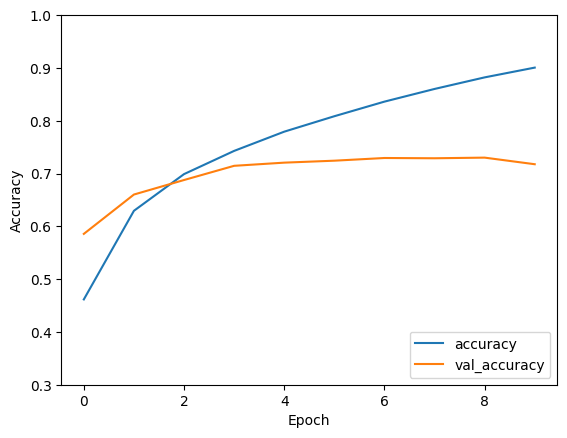

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()

In [12]:
_test_loss, _test_accuracy = model_original.evaluate(test_images, test_labels, verbose=2)
print(f'Test loss: {_test_loss:.05f}, accuracy: {_test_accuracy:.05f}')

313/313 - 1s - loss: 1.1062 - accuracy: 0.7176 - 773ms/epoch - 2ms/step
Test loss: 1.10618, accuracy: 0.71760


##### Service

In [13]:
def service_original(idx):
    # (32,32,3) --> (1,32,32,3)
    sample_data = np.array([test_images[idx]])
    # (1, 10) --> (10,)
    prediction = model_original.predict(sample_data)[0]
    
    x_labels = list(range(0, prediction.size))
    
    plt.figure(figsize=(12,5))
    
    # The first picture among the two pictures, 1 and 2
    plt.subplot(1, 2, 1)
    plt.imshow(sample_data[0, :, :, :], aspect='auto')
    plt.title('Sample image to be predicted')
    
    # The second picture among the two pictures, 1 and 2
    plt.subplot(1, 2, 2)
    plt.bar(x_labels, prediction*100)
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.title('Probability of being the corresponding number')
    
    plt.tight_layout()
    plt.show()
    
    print(
        f'Label: {CLASS_NAMES[test_labels[idx][0]]}, '
        f'Predict: {CLASS_NAMES[np.argmax(prediction)]}'
    )

1/1 [==============================] - 0s 123ms/step


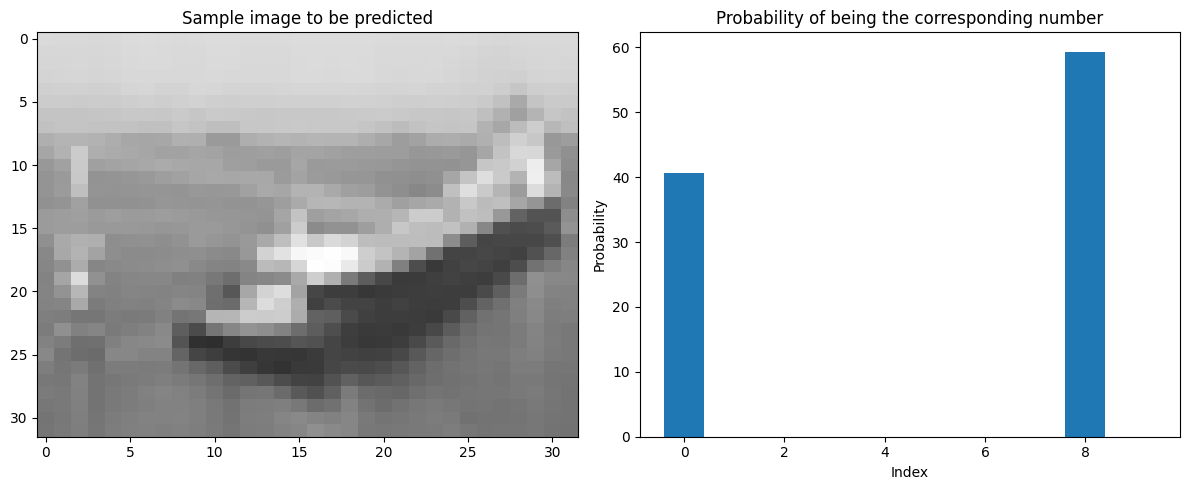

Label: ship, Predict: ship


: 

In [14]:
service_original(120)